# Feature Extraction & Unsupervised Learning: Image Clustering

Libraries

In [1]:
import os
import glob
import numpy as np
import skimage as ski
from skimage import io
import PIL
from PIL import Image
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans  
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as ss

## Read the images from the three folders, Convert images into pixel matrices

In [3]:
path = "data"
folder_names = sorted(os.listdir("data"))

###### Using PIL package

In [4]:
water = []
water_ar = []
for img in glob.glob("data/water/*.jpg"):
    im = Image.open(img)
    im_ar =im.load()
    water.append(im)
    water_ar.append(im_ar)

The $water$ list contains all the images in the water, and the list named $water\_ar$ contains all the image arrays.
I will be using the package skimage as it has a simpler process how ever the name could just be done with the $water\_ar$, $sunset\_ar$, and the $nature\_ar$ lists created with the PIL package.

###### Using skimage, which has a better documentation

skimage package has the function imread_collection to read each image in a folder and collect it in the form of list of arrays. 

In [5]:
water_sk = io.imread_collection("data\water\*.jpg")
nature_sk = io.imread_collection("data\green_nature\*.jpg")
sunset_sk = io.imread_collection("data\sunset\*.jpg")

Creating a dataframe of flattened images (not used later on)

In [6]:
dataframe_images = []
for i in range(0,len(water_sk)):
    img_ar = water_sk[i].reshape(-1,3)  #Flatten image to 120000x3
    dataframe_images.append(img_ar)     #Append to list
    
for i in range(0,len(sunset_sk)):
    img_ar = water_sk[i].reshape(-1,3)  #Flatten image to 120000x3
    dataframe_images.append(img_ar)     #Append to list
    
for i in range(0,len(nature_sk)):
    img_ar = water_sk[i].reshape(-1,3)  #Flatten image to 120000x3
    dataframe_images.append(img_ar)     #Append to list

dataframe_images = np.asarray(dataframe_images)  #create an matrix of images (26x120000x3)

In [7]:
#images can be shown with the function below
#io.imshow(water_sk[1])

## Extract color distribution features from images, Convert the data into a pandas data frame

The dataframe is created on the way, as it easier to check for errors. The same process could be done with combining the np.arrays; the only difference here is that each feature array for an image is added to a dataframe as it is created. 

Column names are created for the dataframe

In [8]:
Columns_R = []
for i in list(np.arange(256)):
    Columns_R.append("R{}".format(i))    #Create list such as ["R0","R1",...]

Columns_G = []
for i in list(np.arange(256)):
    Columns_G.append("G{}".format(i))    #Create list such as ["G0","G1",...]

Columns_B = []
for i in list(np.arange(256)):
    Columns_B.append("B{}".format(i))    #Create list such as ["B0","B1",...]

Image names are created for each cluster

In [9]:
img_names_water = []
for i in range(1,len(water_sk)+1):
    img_names_water.append("water_image_{}".format(i)) #Create list such as ["water_image_1","water_image_2",...]

img_names_sunset = []
for i in range(1,len(sunset_sk)+1):
    img_names_sunset.append("sunset_image_{}".format(i)) #Create list such as ["sunset_image_1","sunset_image_2",...]

img_names_nature = []
for i in range(1,len(nature_sk)+1):
    img_names_nature.append("nature_image_{}".format(i)) #Create list such as ["nature_image_1","nature_image_2",...]

###### The feature matrix for water images is created

In [10]:
# Creating empty dataframes for each layer (R,G,B) of the image
dataframe_R =pd.DataFrame(columns=Columns_R) # Empty dataframe with columns R0,R1,R2...
dataframe_G =pd.DataFrame(columns=Columns_G) # Empty dataframe with columns G0,G1,G2...
dataframe_B =pd.DataFrame(columns=Columns_B) # Empty dataframe with columns B0,B1,B2...

# Appending the dataframe with the histogram values of Red layer
for i in range(0,len(water_sk)):
    #np.arange(257) creates a list from 0 to 256, and histogram bins it as [0,1)...
    #np.histogram()[0] provides a histogram for ith image in the for loop (gives the values in every bin)
    hist = np.histogram(water_sk[i][:,:,0],bins=np.arange(257))[0]
    # Appending the dataframe with the hist but first converted the list in to a series, giving index=Col_R 
    #allows for proper appending to mepty dataframe
    dataframe_R = dataframe_R.append(pd.Series(hist, index=Columns_R), ignore_index=True) 
    #A dataframe of columns R0,.. and rows of water images histograms
    
## The following two for loops are same as above but for G and B layer of the images in water  
# Appending the dataframe with the histogram values of Green layer
for i in range(0,len(water_sk)):
    hist = np.histogram(water_sk[i][:,:,1],bins=np.arange(257))[0]
    dataframe_G = dataframe_G.append(pd.Series(hist, index=Columns_G), ignore_index=True)

# Appending the dataframe with the histogram values of Blue layer
for i in range(0,len(water_sk)):
    hist = np.histogram(water_sk[i][:,:,2],bins=np.arange(257))[0]
    dataframe_B = dataframe_B.append(pd.Series(hist, index=Columns_B), ignore_index=True)


# Merging the dataframes to create the feature matrix of 9x768 
# 9 images in the water folder as rows an R0,..G0,..B0,.. as columns
dataframe_w = dataframe_R.join(dataframe_G, how="left").join(dataframe_B,how="left")
# Inserting the image name and cluster column
dataframe_w.insert(loc=0, column='Image_names', value=img_names_water)
dataframe_w.insert(loc=1, column='Cluster', value=np.ones((len(water_sk),), dtype=int))
print("The first row of dataframe with only water images:")
dataframe_w.head(1)

The first row of dataframe with only water images:


,Image_names,Cluster,R0,R1,R2,R3,R4,R5,R6,R7,...,B246,B247,B248,B249,B250,B251,B252,B253,B254,B255
0,water_image_1,1,2,9,7,7,13,31,30,25,...,3182,3527,4893,9985,8486,3926,1298,233,175,58


The same process is repeated for each type

###### The feature matrix for sunset images is created

In [11]:
dataframe_R =pd.DataFrame(columns=Columns_R)
dataframe_G =pd.DataFrame(columns=Columns_G)
dataframe_B =pd.DataFrame(columns=Columns_B)

for i in range(0,len(sunset_sk)):
    hist = np.histogram(sunset_sk[i][:,:,0],bins=np.arange(257))[0]
    dataframe_R = dataframe_R.append(pd.Series(hist, index=Columns_R), ignore_index=True)

for i in range(0,len(sunset_sk)):
    hist = np.histogram(sunset_sk[i][:,:,1],bins=np.arange(257))[0]
    dataframe_G = dataframe_G.append(pd.Series(hist, index=Columns_G), ignore_index=True)
    
for i in range(0,len(sunset_sk)):
    hist = np.histogram(sunset_sk[i][:,:,2],bins=np.arange(257))[0]
    dataframe_B = dataframe_B.append(pd.Series(hist, index=Columns_B), ignore_index=True)

dataframe_s = dataframe_R.join(dataframe_G, how="left").join(dataframe_B,how="left")
dataframe_s.insert(loc=0, column='Image_names', value=img_names_sunset)
dataframe_s.insert(loc=1, column='Cluster', value=2*np.ones((len(sunset_sk),), dtype=int))
print("The first row of dataframe with only sunset images:")
dataframe_s.head(1)

The first row of dataframe with only sunset images:


,Image_names,Cluster,R0,R1,R2,R3,R4,R5,R6,R7,...,B246,B247,B248,B249,B250,B251,B252,B253,B254,B255
0,sunset_image_1,2,87,258,877,1736,2282,2455,2444,2455,...,0,0,0,0,0,0,0,0,0,0


###### The feature matrix for nature images is created

In [12]:
dataframe_R =pd.DataFrame(columns=Columns_R)
dataframe_G =pd.DataFrame(columns=Columns_G)
dataframe_B =pd.DataFrame(columns=Columns_B)

for i in range(0,len(nature_sk)):
    hist = np.histogram(nature_sk[i][:,:,0],bins=np.arange(257))[0]
    dataframe_R = dataframe_R.append(pd.Series(hist, index=Columns_R), ignore_index=True)

for i in range(0,len(nature_sk)):
    hist = np.histogram(nature_sk[i][:,:,1],bins=np.arange(257))[0]
    dataframe_G = dataframe_G.append(pd.Series(hist, index=Columns_G), ignore_index=True)
    
for i in range(0,len(nature_sk)):
    hist = np.histogram(nature_sk[i][:,:,2],bins=np.arange(257))[0]
    dataframe_B = dataframe_B.append(pd.Series(hist, index=Columns_B), ignore_index=True)

dataframe_n = dataframe_R.join(dataframe_G, how="left").join(dataframe_B,how="left")
dataframe_n.insert(loc=0, column='Image_names', value=img_names_nature)
dataframe_n.insert(loc=1, column='Cluster', value=3*np.ones((len(nature_sk),), dtype=int))
print("The first row of dataframe with only nature images:")
dataframe_n.head(1)

The first row of dataframe with only nature images:


,Image_names,Cluster,R0,R1,R2,R3,R4,R5,R6,R7,...,B246,B247,B248,B249,B250,B251,B252,B253,B254,B255
0,nature_image_1,3,0,0,0,0,0,0,0,0,...,76,60,37,42,43,28,20,14,23,71


###### The dataframes of each type is combined together to create the Dataframe stated in task 4

In [13]:
df = pd.concat([dataframe_w, dataframe_s, dataframe_n], ignore_index=True)

In [14]:
print("The dataframe containing all water,sunset and nature images")
df

The dataframe containing all water,sunset and nature images


,Image_names,Cluster,R0,R1,R2,R3,R4,R5,R6,R7,...,B246,B247,B248,B249,B250,B251,B252,B253,B254,B255
0,water_image_1,1,2,9,7,7,13,31,30,25,...,3182,3527,4893,9985,8486,3926,1298,233,175,58
1,water_image_2,1,85,11,10,22,22,10,17,17,...,3561,2742,2144,3995,5136,3307,1973,1449,207,1350
2,water_image_3,1,32,8,13,14,16,28,30,43,...,12,19,17,23,5,12,13,10,4,57
3,water_image_4,1,396,567,738,427,439,508,623,656,...,1864,1748,1429,1051,652,325,167,79,51,101
4,water_image_5,1,1204,349,443,568,743,1287,953,799,...,725,548,535,436,410,366,367,331,305,2328
5,water_image_6,1,12947,6625,5112,3793,2857,2544,2422,2220,...,958,855,782,665,617,543,470,410,375,2923
6,water_image_7,1,7135,2164,2107,1930,1680,1417,1165,1012,...,2854,2907,2749,2857,2949,2794,2556,2190,1851,7759
7,water_image_8,1,4383,1596,1648,1115,748,482,410,328,...,982,958,1032,1131,1241,1483,1818,1976,2013,6386
8,water_image_9,1,908,126,174,147,169,193,212,222,...,2281,2486,2954,3152,3266,3340,3915,3510,2017,1681
9,sunset_image_1,2,87,258,877,1736,2282,2455,2444,2455,...,0,0,0,0,0,0,0,0,0,0


## Cluster the images, Evaluate the clustering accuracy

In [15]:
# Removing the image names and cluster labels
train = df.iloc[:,2:]
print("train is the feature dataset, the first 5 rows:")
train.head()

train is the feature dataset, the first 5 rows:


,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,B246,B247,B248,B249,B250,B251,B252,B253,B254,B255
0,2,9,7,7,13,31,30,25,19,24,...,3182,3527,4893,9985,8486,3926,1298,233,175,58
1,85,11,10,22,22,10,17,17,6,5,...,3561,2742,2144,3995,5136,3307,1973,1449,207,1350
2,32,8,13,14,16,28,30,43,29,52,...,12,19,17,23,5,12,13,10,4,57
3,396,567,738,427,439,508,623,656,724,670,...,1864,1748,1429,1051,652,325,167,79,51,101
4,1204,349,443,568,743,1287,953,799,877,810,...,725,548,535,436,410,366,367,331,305,2328


In [16]:
labels = df.iloc[:,1]-1  # Adjust the labels accordingly by -1 to have the same values as predictions

### Kmeans & Predictions & Score

In [17]:
kmeans = KMeans(n_clusters=3)      # defining model
kmeans.fit(train) # (train: 26x768) 
print("Predicitons:",kmeans.labels_) 
###
# Warning: run several times until you get 0 for the first cluster, 1 for the second and 2 for the third one
###
print("Rand_index:",adjusted_rand_score(labels, kmeans.labels_))


Predicitons: [0 0 0 0 0 0 0 0 0 2 1 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1]
Rand_index: 0.6857142857142857


## Dimensionality Reduction

##### Scaling the features dataframe to have mean 0.

In [18]:
scaler = ss()
scaled_train = scaler.fit_transform(train)

C:\Users\khann\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\khann\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


##### Kmeans on scaled features

In [19]:
kmeans = KMeans(n_clusters=3)  
kmeans.fit(scaled_train)
print("Predicitons:",kmeans.labels_)
###
# Warning: run several times until you get 0 for the first cluster, 1 for the second and 2 for the third to have better score
###
print("Rand_index:",adjusted_rand_score(labels, kmeans.labels_))

Predicitons: [0 0 0 0 0 0 0 0 0 2 2 1 1 1 1 2 1 1 1 2 1 2 2 2 2 2]
Rand_index: 0.5666666666666667


Dimensinality Reduction method PCA requires the number of samples to be larger than the number of components to be used. The reason for this is the math behind PCA. (In most simple terms the eigenvalue matrix is symmetrical)

In our case, we have 26 samples and 768 features. The 5 component and 2 component PCA can be calculated, however to be able to obtain a principal components more than 26 is not possible with this dataset without altering.

In [20]:
# Creating the table in the last task as an empty dataframe 
Results_df = pd.DataFrame(columns =["Dimensions", "Ratio of explain variance", "Clustering Rand_index"])
Results_df["Dimensions"]=[768,400,200,50,5,2]

For, 768,400, 200 and 50 a new dataset was created by copying every image 26 times, to create a over sampled dataframe

In [21]:
df_over = df
for c in range(0,29):
    df_over = pd.concat([df_over, df], ignore_index=True) # add df 30 times to the dataframe to create 780 rows × 770 columns
    
over_train = df_over.iloc[:,2:] #leaving out image_names and cluster to obtain the features (train) dataframe
over_scaled_train = scaler.fit_transform(over_train) # Scaling the dataframe to have zero mean 
over_labels = df_over.iloc[:,1] # getting cluster column as labels

C:\Users\khann\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\khann\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
df_over.head(5)

,Image_names,Cluster,R0,R1,R2,R3,R4,R5,R6,R7,...,B246,B247,B248,B249,B250,B251,B252,B253,B254,B255
0,water_image_1,1,2,9,7,7,13,31,30,25,...,3182,3527,4893,9985,8486,3926,1298,233,175,58
1,water_image_2,1,85,11,10,22,22,10,17,17,...,3561,2742,2144,3995,5136,3307,1973,1449,207,1350
2,water_image_3,1,32,8,13,14,16,28,30,43,...,12,19,17,23,5,12,13,10,4,57
3,water_image_4,1,396,567,738,427,439,508,623,656,...,1864,1748,1429,1051,652,325,167,79,51,101
4,water_image_5,1,1204,349,443,568,743,1287,953,799,...,725,548,535,436,410,366,367,331,305,2328


In [23]:
over_train.head(5)

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,B246,B247,B248,B249,B250,B251,B252,B253,B254,B255
0,2,9,7,7,13,31,30,25,19,24,...,3182,3527,4893,9985,8486,3926,1298,233,175,58
1,85,11,10,22,22,10,17,17,6,5,...,3561,2742,2144,3995,5136,3307,1973,1449,207,1350
2,32,8,13,14,16,28,30,43,29,52,...,12,19,17,23,5,12,13,10,4,57
3,396,567,738,427,439,508,623,656,724,670,...,1864,1748,1429,1051,652,325,167,79,51,101
4,1204,349,443,568,743,1287,953,799,877,810,...,725,548,535,436,410,366,367,331,305,2328


PCA with 768 PCs, obtained by using Over Sampled Dataframe

In [24]:
dim = 768
pc = PCA(n_components=dim)
train_pc = pc.fit_transform(over_scaled_train)
train_pc_pd = pd.DataFrame(data= train_pc)
print("Explained varience ratio:", pc.explained_variance_ratio_.sum())
Results_df.loc[Results_df["Dimensions"]==dim,"Ratio of explain variance"] = pc.explained_variance_ratio_.sum()
# Kmeans
kmeans = KMeans(n_clusters=3)  
kmeans.fit(train_pc_pd)
print("Rand_index:",adjusted_rand_score(over_labels, kmeans.labels_))
print("Predictions:",kmeans.labels_)
Results_df.loc[Results_df["Dimensions"]==dim,"Clustering Rand_index"] = adjusted_rand_score(over_labels, kmeans.labels_)

Explained varience ratio: 1.0
Rand_index: 0.5659541473146099
Predictions: [2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 0 1 1 2 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0
 1 1 1 1 0 1 1 2 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 0 1 1 2 0 2 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 0 1 1 2 0 2 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 0 0 1 1 1 1 0 1 1 2 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 0 1 1
 2 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 0 1 1 2 0 2 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 0 0 1 1 1 1 0 1 1 2 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 1 1 1
 1 0 1 1 2 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 0 1 1 2 0 2 0 0 0 0
 0 2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 0 1 1 2 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0
 0 1 1 1 1 0 1 1 2 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 0 1 1 2 0 2
 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 0 1 1 2 0 2 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 0 0 1 1 1 1 0 1 1 2 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 0 1
 1 2 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 0 1 1 2 0 2 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 0 0 1 1 1 1

PCA with 400 PCs, obtained by using Over Sampled Dataframe

In [25]:
dim = 400
pc = PCA(n_components=dim)
train_pc = pc.fit_transform(over_scaled_train)
train_pc_pd = pd.DataFrame(data= train_pc)
print("Explained varience ratio:", pc.explained_variance_ratio_.sum())
Results_df.loc[Results_df["Dimensions"]==dim,"Ratio of explain variance"] = pc.explained_variance_ratio_.sum()
# Kmeans
kmeans = KMeans(n_clusters=3)  
kmeans.fit(train_pc_pd)
print("Rand_index:",adjusted_rand_score(over_labels, kmeans.labels_))
print("Predictions:",kmeans.labels_)
Results_df.loc[Results_df["Dimensions"]==dim,"Clustering Rand_index"] = adjusted_rand_score(over_labels, kmeans.labels_)

Explained varience ratio: 1.0000000000000022
Rand_index: 0.5175694292446149
Predictions: [0 0 0 0 0 0 0 0 0 1 1 2 2 2 2 1 1 2 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 2 2 2 2 1 1 2 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 2 2 2 2 1 1 2 0 1 0 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 2 2 2 2 1 1 2 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 1 1 2 2 2 2 1 1 2 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 2 2 2 2 1 1 2
 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 2 2 2 2 1 1 2 0 1 0 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 1 1 2 2 2 2 1 1 2 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 2 2 2
 2 1 1 2 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 2 2 2 2 1 1 2 0 1 0 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 1 2 2 2 2 1 1 2 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 2 2 2 2 1 1 2 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 2 2 2 2 1 1 2 0 1 0
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 2 2 2 2 1 1 2 0 1 0 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 1 1 2 2 2 2 1 1 2 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 2 2 2 2 1 1
 2 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 2 2 2 2 1 1 2 0 1 0 1 1 1 1 1 0 0
 0 0 0 0 0 

PCA with 200 PCs, obtained by using Over Sampled Dataframe

In [26]:
dim = 200
pc = PCA(n_components=dim)
train_pc = pc.fit_transform(over_scaled_train)
train_pc_pd = pd.DataFrame(data= train_pc)
print("Explained varience ratio:", pc.explained_variance_ratio_.sum())
Results_df.loc[Results_df["Dimensions"]==dim,"Ratio of explain variance"] = pc.explained_variance_ratio_.sum()
# Kmeans
kmeans = KMeans(n_clusters=3)  
kmeans.fit(train_pc_pd)
print("Rand_index:",adjusted_rand_score(over_labels, kmeans.labels_))
print("Predictions:",kmeans.labels_)
Results_df.loc[Results_df["Dimensions"]==dim,"Clustering Rand_index"] = adjusted_rand_score(over_labels, kmeans.labels_)

Explained varience ratio: 0.9999999999999997
Rand_index: 0.5320468723051841
Predictions: [2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 1 1 0 2 1 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1
 0 0 0 0 1 1 0 2 1 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 1 1 0 2 1 0 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 1 1 0 2 1 0 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 1 1 0 0 0 0 1 1 0 2 1 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 1 1 0
 2 1 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 1 1 0 2 1 0 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 1 1 0 0 0 0 1 1 0 2 1 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 0 0 0
 0 1 1 0 2 1 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 1 1 0 2 1 0 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 1 1 0 2 1 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1
 1 0 0 0 0 1 1 0 2 1 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 1 1 0 2 1 0
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 1 1 0 2 1 0 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 1 1 0 0 0 0 1 1 0 2 1 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 1 1
 0 2 1 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 1 1 0 2 1 0 1 1 1 1 1 2 2
 2 2 2 2 2 

PCA with 50 PCs, obtained by using Over Sampled Dataframe

In [27]:
dim = 50
pc = PCA(n_components=dim)
train_pc = pc.fit_transform(over_scaled_train)
train_pc_pd = pd.DataFrame(data= train_pc)
print("Explained varience ratio:", pc.explained_variance_ratio_.sum())
Results_df.loc[Results_df["Dimensions"]==dim,"Ratio of explain variance"] = pc.explained_variance_ratio_.sum()
# Kmeans
kmeans = KMeans(n_clusters=3)  
kmeans.fit(train_pc_pd)
print("Rand_index:",adjusted_rand_score(over_labels, kmeans.labels_))
print("Predictions:",kmeans.labels_)
Results_df.loc[Results_df["Dimensions"]==dim,"Clustering Rand_index"] = adjusted_rand_score(over_labels, kmeans.labels_)

Explained varience ratio: 1.0
Rand_index: 0.6342898301601486
Predictions: [1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 1 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0
 2 2 2 2 2 2 2 1 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 1 0 2 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 1 0 2 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 2 2 2 2 2 2 2 1 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2
 1 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 1 0 2 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 1 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 2 2 2
 2 2 2 2 1 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 1 0 2 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 1 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0
 0 2 2 2 2 2 2 2 1 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 1 0 2
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 1 0 2 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 0 0 2 2 2 2 2 2 2 1 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2
 2 1 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 1 0 2 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 2 2 2 2

PCA with 5 PCs, obtained by using the images provided --> the df

In [28]:
dim = 5
pc = PCA(n_components=dim) # define pca model
train_pc = pc.fit_transform(scaled_train) # Fit and transform the scaled_train dataframe
train_pc_pd = pd.DataFrame(data= train_pc) # convert to pandas
print("Explained varience ratio:", pc.explained_variance_ratio_.sum()) 
Results_df.loc[Results_df["Dimensions"]==dim,"Ratio of explain variance"] = pc.explained_variance_ratio_.sum() # add the results to Results_df

# Kmeans
kmeans = KMeans(n_clusters=3)  
kmeans.fit(train_pc_pd)
print("Rand_index:",adjusted_rand_score(labels, kmeans.labels_))
print("Predictions:",kmeans.labels_)
Results_df.loc[Results_df["Dimensions"]==dim,"Clustering Rand_index"] = adjusted_rand_score(labels, kmeans.labels_) # add the results to results df.

Explained varience ratio: 0.6131792576974289
Rand_index: 0.5666666666666667
Predictions: [2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0]


PCA with 2 PCs, obtained by using the images provided --> the df

In [29]:
dim = 2
pc = PCA(n_components=dim)
train_pc = pc.fit_transform(scaled_train)
train_pc_pd = pd.DataFrame(data= train_pc)
train_2_pd = train_pc_pd # Fixing for next step
print("Explained varience ratio:", pc.explained_variance_ratio_.sum())
Results_df.loc[Results_df["Dimensions"]==dim,"Ratio of explain variance"] = pc.explained_variance_ratio_.sum()
# Kmeans
kmeans = KMeans(n_clusters=3)  
kmeans.fit(train_pc_pd)
print("Rand_index:",adjusted_rand_score(labels, kmeans.labels_))
print("Predictions:",kmeans.labels_)
Results_df.loc[Results_df["Dimensions"]==dim,"Clustering Rand_index"] = adjusted_rand_score(labels, kmeans.labels_)

Explained varience ratio: 0.37008874417346627
Rand_index: 0.5116022099447514
Predictions: [1 1 0 1 1 1 1 1 1 0 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 2]


In [30]:
Results_df

,Dimensions,Ratio of explain variance,Clustering Rand_index
0,768,1,0.565954
1,400,1,0.517569
2,200,1,0.532047
3,50,1,0.63429
4,5,0.613179,0.566667
5,2,0.370089,0.511602


## Visualization

In [31]:
import altair as alt# A very useful and easy data visualization tool 
from vega_datasets import data
alt.renderers.enable('notebook') # This line is needed to show on jupyter

RendererRegistry.enable('notebook')

In [32]:
# Add the image names and cluster labels to dataframe
train_2_pd.insert(loc=0,column="Cluster", value= df["Cluster"].values)
train_2_pd.insert(loc=0, column='Image_names', value=df["Image_names"].values)
#Change the column names from 0 and 1 to PC1 and PC2
train_2_pd = train_2_pd.rename(index=str, columns={0: "PC1", 1: "PC2"})

To draw an interactive plot Altair library is used, the image name and cluster is shown on the data point

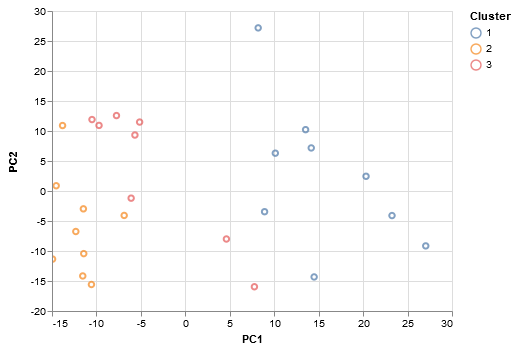

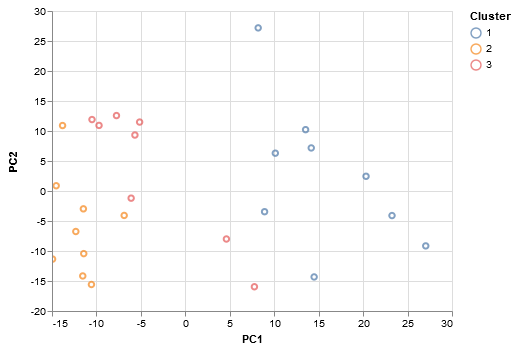

In [33]:
alt.Chart(train_2_pd).mark_point().encode(
    x="PC1:Q",
    y="PC2:Q",
    color="Cluster:N", 
    tooltip=['Cluster', "Image_names"]  # defining interactivity
).interactive()